In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
train_df = pd.read_csv("./airbnb-recruiting-new-user-bookings/train_users_2.csv.zip")
test_df = pd.read_csv("./airbnb-recruiting-new-user-bookings/test_users.csv.zip")

In [3]:
train_users = train_df.copy()
test_users = train_df.copy()
train_users.shape, test_users.shape

((213451, 16), (213451, 16))

In [4]:
labels = train_users['country_destination'].values
id_test = test_users['id']
train_users = train_users.drop(['country_destination'], axis=1)
# Concatenate train and test data for EDA
df_all = pd.concat([train_users,  test_users], ignore_index=True)
df_all.shape

(426902, 16)

In [5]:
df_all.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NaN
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NaN
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,NaN
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NaN
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NaN


In [6]:
for column in df_all.columns:
    null_count = df_all[column].isnull().sum()
    if null_count > 0:
        print(f"{column} has {null_count} null values.\n")


date_first_booking has 249086 null values.

age has 175980 null values.

first_affiliate_tracked has 12130 null values.

country_destination has 213451 null values.



In [7]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426902 entries, 0 to 426901
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       426902 non-null  object 
 1   date_account_created     426902 non-null  object 
 2   timestamp_first_active   426902 non-null  int64  
 3   date_first_booking       177816 non-null  object 
 4   gender                   426902 non-null  object 
 5   age                      250922 non-null  float64
 6   signup_method            426902 non-null  object 
 7   signup_flow              426902 non-null  int64  
 8   language                 426902 non-null  object 
 9   affiliate_channel        426902 non-null  object 
 10  affiliate_provider       426902 non-null  object 
 11  first_affiliate_tracked  414772 non-null  object 
 12  signup_app               426902 non-null  object 
 13  first_device_type        426902 non-null  object 
 14  firs

In [8]:
df_all = df_all.drop(['id','date_first_booking'], axis = 1)


In [9]:
null_counts = df_all.isnull().sum()
null_columns = null_counts[null_counts != 0].index

for col in null_columns:
    print(f"{col} has {null_counts[col]} null values.\n")

age has 175980 null values.

first_affiliate_tracked has 12130 null values.

country_destination has 213451 null values.



In [10]:
df_all.gender.value_counts()

-unknown-    191376
FEMALE       126082
MALE         108880
OTHER           564
Name: gender, dtype: int64

In [11]:
# 年紀不合理
df_all.age.describe()

count    250922.000000
mean         49.668335
std         155.666302
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [12]:
df_all.loc[df_all['age'] < 15, 'age'] = np.nan
df_all.loc[df_all['age'] >= 100, 'age'] = np.nan

In [13]:
categorical_features = ['affiliate_channel',
                        'affiliate_provider',    
                        'first_affiliate_tracked',    
                        'first_browser',    
                        'first_device_type',    
                        'gender',    
                        'language',    
                        'signup_app',    
                        'signup_method',    
                        'signup_flow']

df_all[categorical_features] = df_all[categorical_features].astype('category')


In [14]:
df_all['date_account_created'] = pd.to_datetime(df_all['date_account_created'])
df_all['timestamp_first_active'] = pd.to_datetime(df_all['timestamp_first_active'], format='%Y%m%d%H%M%S')

In [15]:
sns.set_style('whitegrid')
sns.set_context("talk")

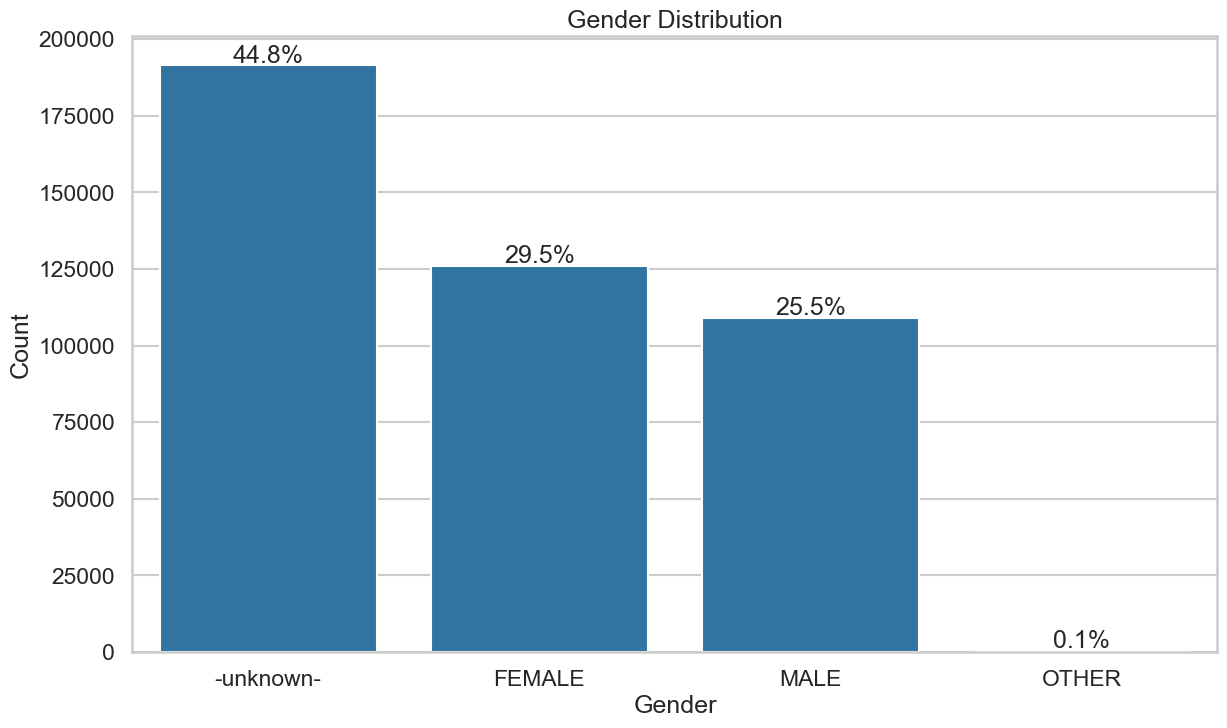

In [16]:
# Finding the gender distribution
gender_counts = df_all['gender'].value_counts()
gender_order = gender_counts.index

plt.figure(figsize=(14,8))
sns.countplot(data=df_all, x='gender', order=gender_order, color=sns.color_palette()[0])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

for i, count in enumerate(gender_counts):
    percent = count / df_all.shape[0] * 100
    plt.text(i, count+1000, f'{percent:.1f}%', ha='center')


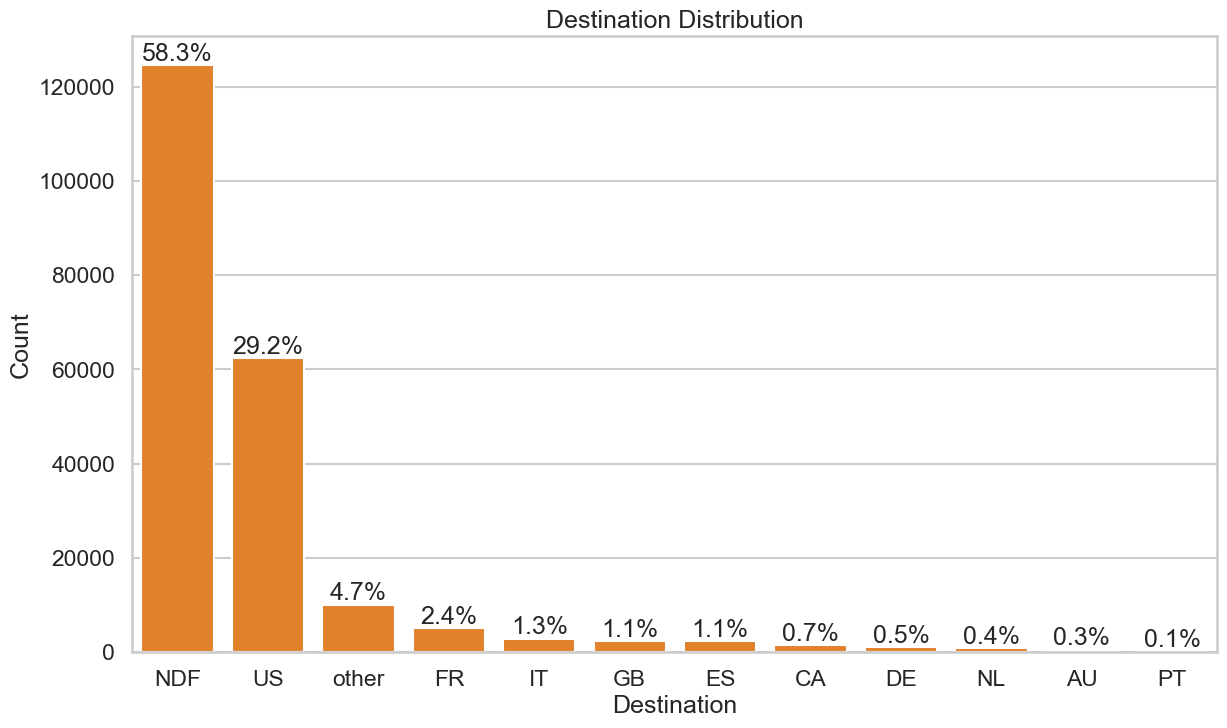

In [17]:
#Finding Destination Distribution.
def plot_destination_distribution(df):
    plt.figure(figsize=(14,8))
    order1 = df['country_destination'].value_counts().index
    sns.countplot(data = df, x = 'country_destination', order = order1, color = sns.color_palette()[1])
    plt.xlabel('Destination')
    plt.ylabel('Count')
    plt.title('Destination Distribution')
    order2 = df['country_destination'].value_counts()

    for i in range(order2.shape[0]):
        count = order2[i]
        strt='{:0.1f}%'.format(100*count / df.shape[0])
        plt.text(i,count+1000,strt,ha='center')

plot_destination_distribution(train_df)


In [18]:
# 提取 date_account_created 的年份
df_all['acc_year'] = pd.DatetimeIndex(df_all['date_account_created']).year

# 根據 acc_year 做分組統計
df1 = df_all['acc_year'].value_counts().sort_index().reset_index()
df1.columns = ['acc_year', 'count']

# 設定顯示年份順序
years = [2010, 2011, 2012, 2013, 2014]
years_order = pd.CategoricalDtype(categories=years, ordered=True)
df1['acc_year'] = df1['acc_year'].astype(years_order)


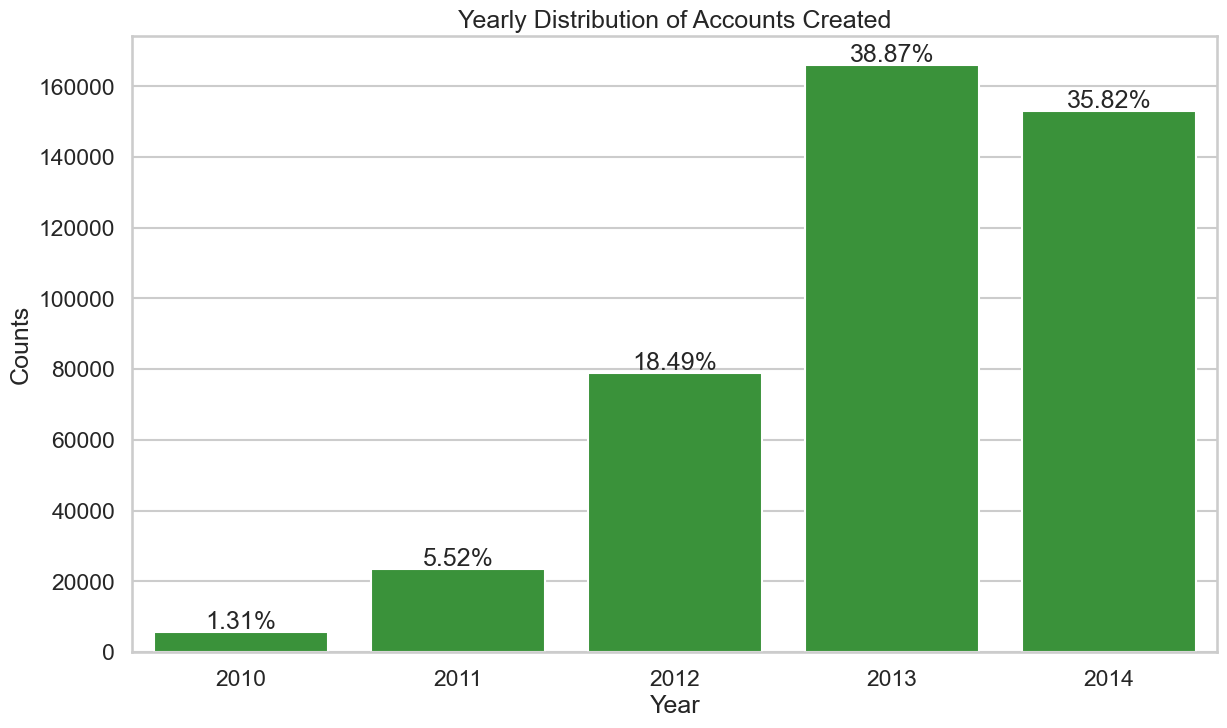

In [19]:
# 抽取 date_account_created 的年份
df_all['account_created_year'] = df_all['date_account_created'].dt.year

# 按年份分組，計算總數
df_yearly_count = df_all.groupby('account_created_year').count()

# 設定年份的排序，並轉換資料型態
years = [2010, 2011, 2012, 2013, 2014]
years_order = pd.api.types.CategoricalDtype(ordered=True, categories=years)
df_yearly_count.reset_index(inplace=True)
df_yearly_count.account_created_year = df_yearly_count.account_created_year.astype(years_order)

# 繪製年份分佈長條圖
plt.figure(figsize=[14, 8])
sns.barplot(data=df_yearly_count, x='account_created_year', y='affiliate_provider', color=sns.color_palette()[2])
plt.title('Yearly Distribution of Accounts Created')
plt.xlabel('Year')
plt.ylabel('Counts')

# 在長條圖上標註每個長條的百分比
for i in range(df_yearly_count.shape[0]):
    count = df_yearly_count.iloc[i]['affiliate_provider']
    percent = '{:.2f}%'.format(100 * count / df_all.shape[0])
    plt.text(i, count + 1000, percent, ha='center')


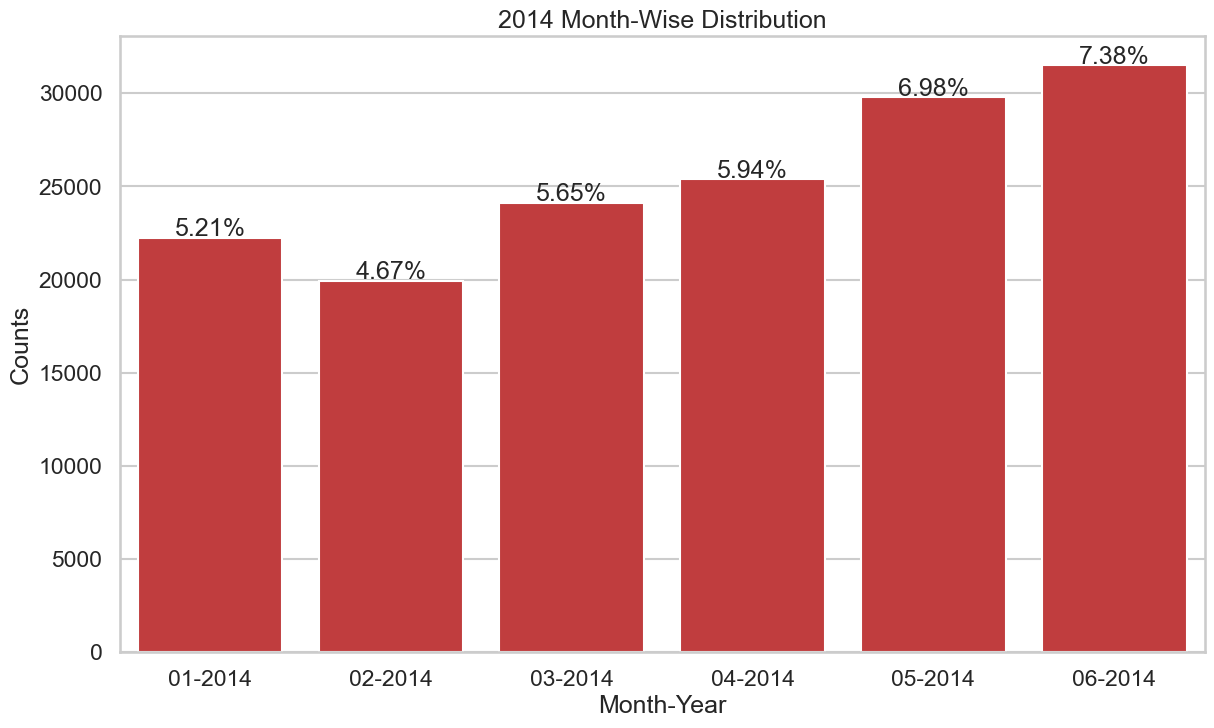

In [20]:
# Subset data for the year 2014
df2 = df_all[df_all['date_account_created'].dt.year == 2014]

# Create a new column with month-year format
df2['monthYear14'] = df2['date_account_created'].dt.strftime('%m-%Y')

# Group data by month-year and count the values
df2 = df2.groupby('monthYear14').count()

# Plot a bar chart
plt.figure(figsize=[14,8])
sns.barplot(data=df2, x=df2.index, y='affiliate_provider', color=sns.color_palette()[3])
plt.title('2014 Month-Wise Distribution')
plt.xlabel('Month-Year')
plt.ylabel('Counts')

# Display percentage values on the plot
for i in range(df2.shape[0]):
    count = df2.iloc[i]['affiliate_provider']
    pct = '{:0.2f}%'.format(100 * count / df_all.shape[0])
    plt.text(i, count + 100, pct, ha='center')


In [21]:
# Create age bins
bins = [18, 20, 30, 40, 50, 60, 70, 100]
labels = ['18 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70+']
df_all['member_age_bins'] = pd.cut(df_all['age'], bins=bins, labels=labels, include_lowest=True)

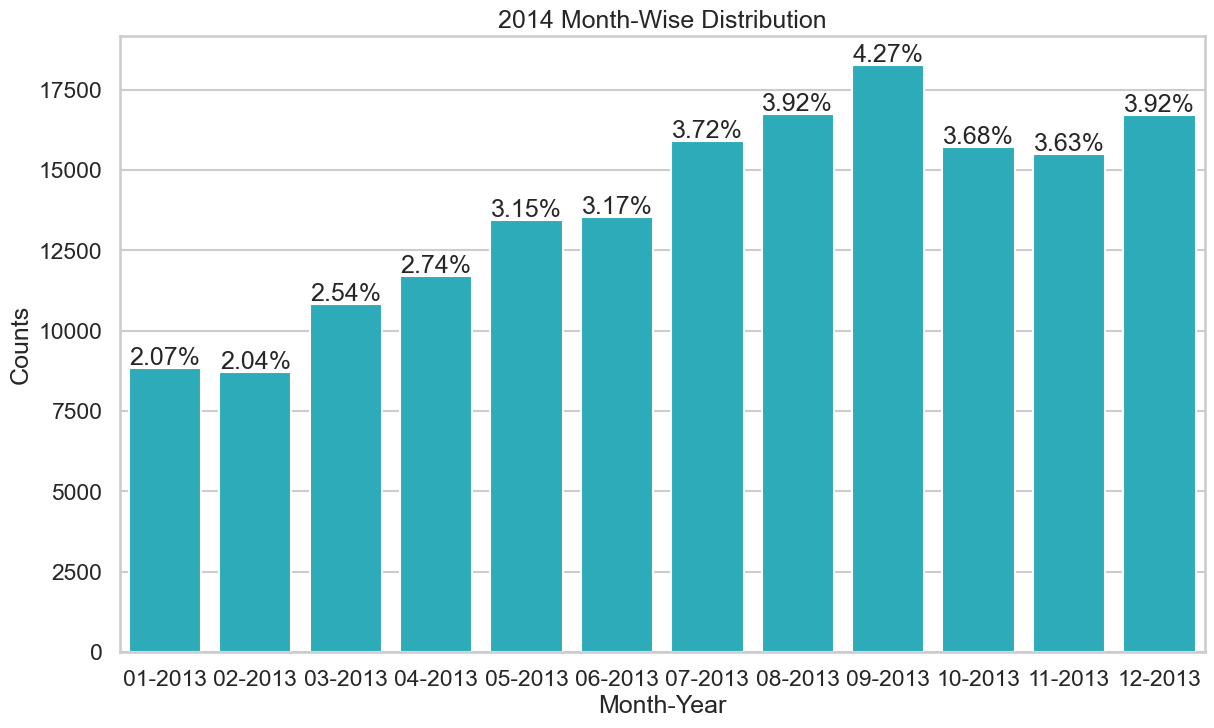

In [31]:
# Subset data for the year 2014
df3 = df_all[df_all['date_account_created'].dt.year == 2013]

# Create a new column with month-year format
df3['monthYear14'] = df3['date_account_created'].dt.strftime('%m-%Y')

# Group data by month-year and count the values
df3 = df3.groupby('monthYear14').count()

# Plot a bar chart
plt.figure(figsize=[14,8])
sns.barplot(data=df3, x=df3.index, y='affiliate_provider', color=sns.color_palette()[9])
plt.title('2013 Month-Wise Distribution')
plt.xlabel('Month-Year')
plt.ylabel('Counts')

# Display percentage values on the plot
for i in range(df3.shape[0]):
    count = df3.iloc[i]['affiliate_provider']
    pct = '{:0.2f}%'.format(100 * count / df_all.shape[0])
    plt.text(i, count + 100, pct, ha='center')


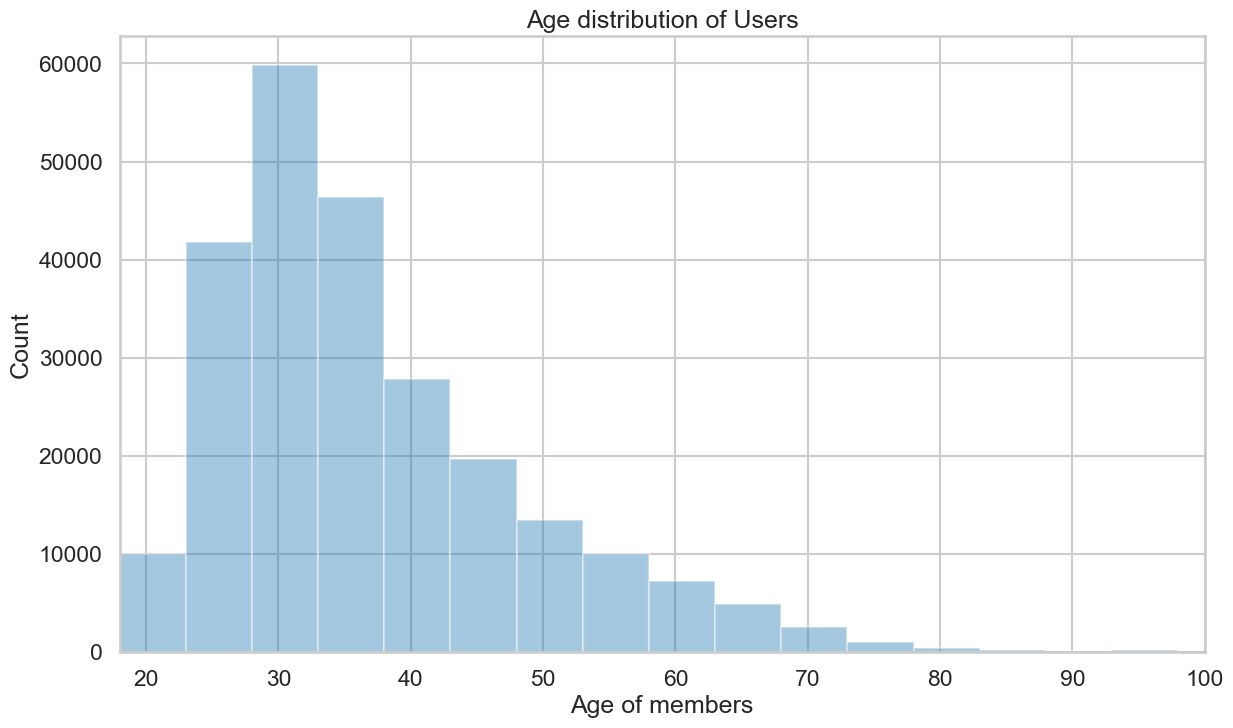

In [33]:
#Plotting Age distribution of the members
plt.figure(figsize=[14,8])
sns.distplot(df_all.age.dropna(),bins=np.arange(18,100+5,5),color=sns.color_palette()[0],kde=False);
plt.xlabel('Age of members')
plt.ylabel('Count')
plt.title('Age distribution of Users')
plt.xlim(18,100)


Text(0.5, 1.0, 'Destination-Age Distribution')

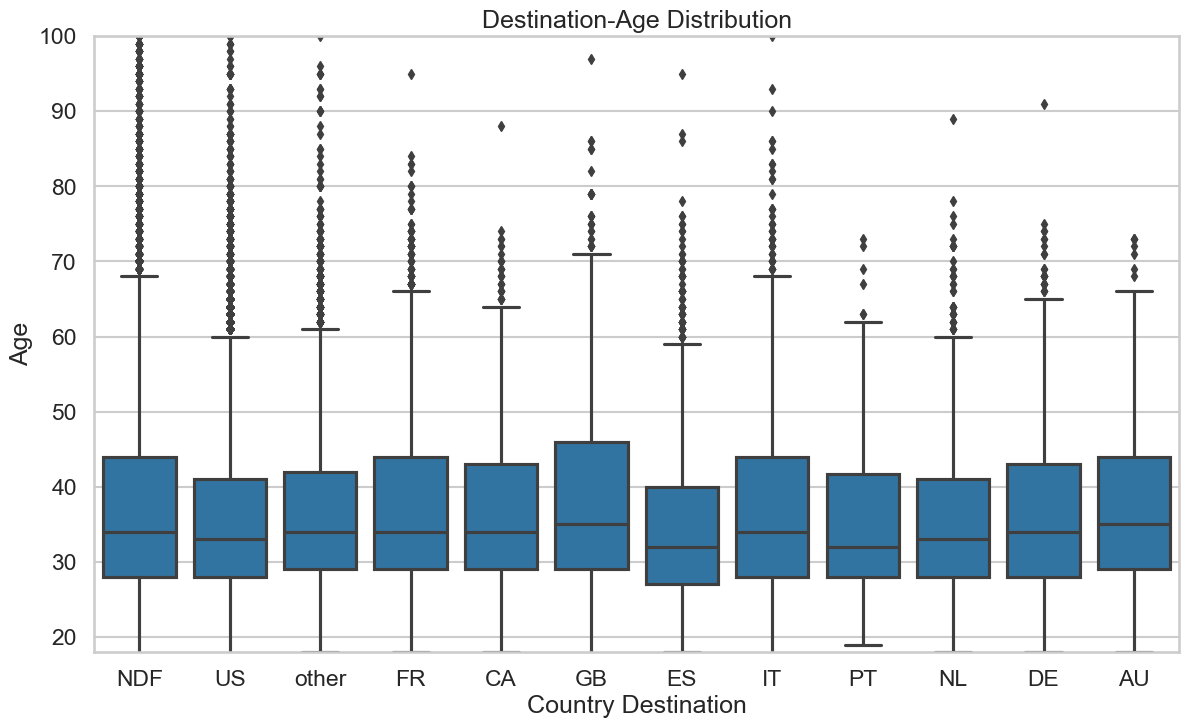

In [37]:
# Create a box plot of age distribution for each country destination
plt.figure(figsize=[14, 8])
sns.boxplot(data=train_df, y='age', x='country_destination', color=sns.color_palette()[0])
plt.ylim(18, 100)
plt.xlabel('Country Destination')
plt.ylabel('Age')
plt.title('Destination-Age Distribution')


Text(0.5, 1.0, 'Destination-Age Distribution')

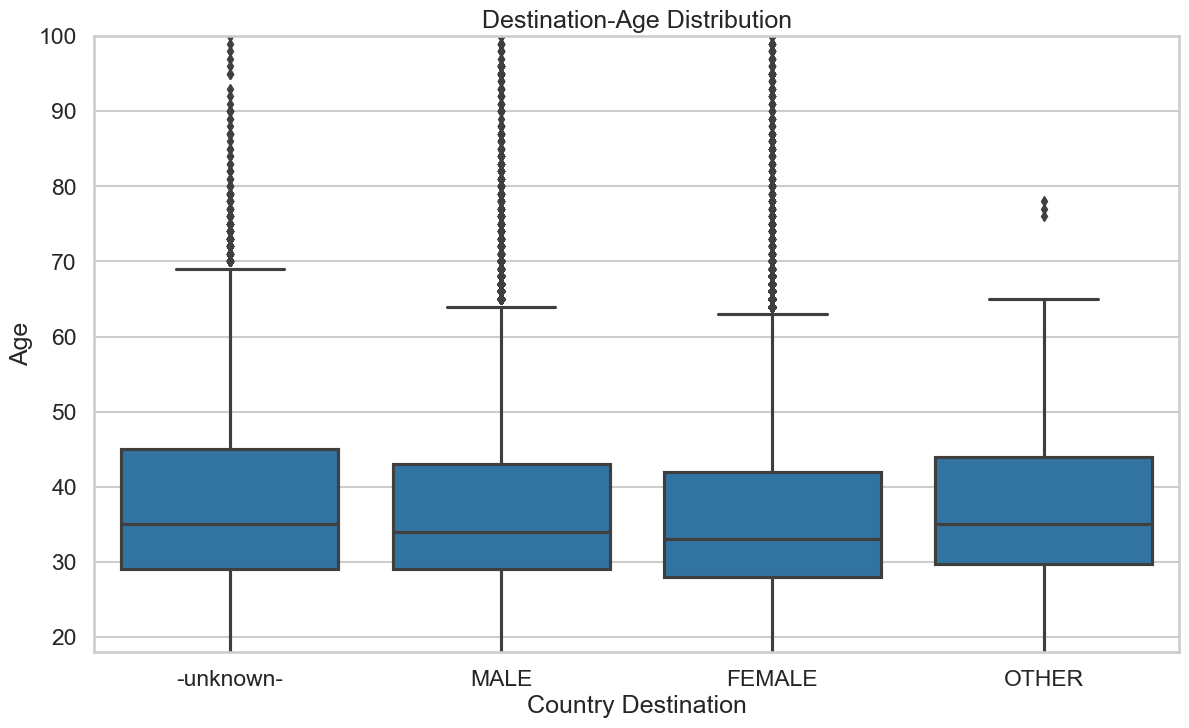

In [38]:
plt.figure(figsize=[14, 8])
sns.boxplot(data=train_df, y='age', x='gender', color=sns.color_palette()[0])
plt.ylim(18, 100)
plt.xlabel('Country Destination')
plt.ylabel('Age')
plt.title('Destination-Age Distribution')


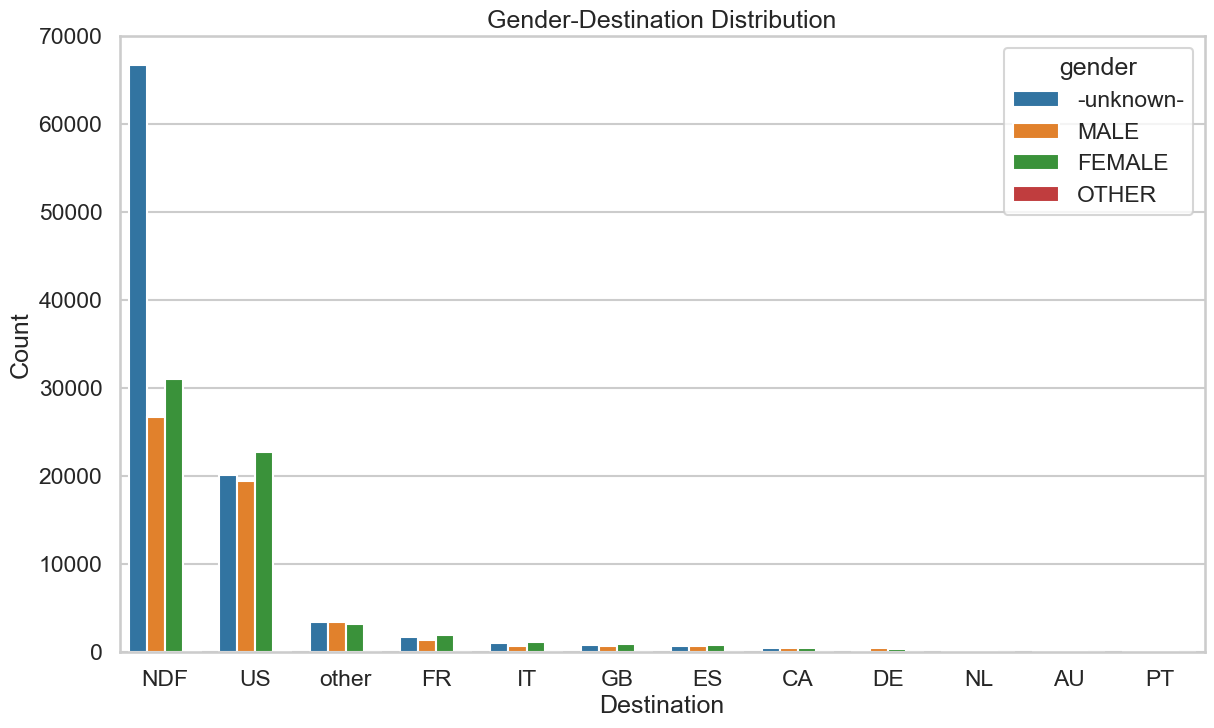

In [39]:
plt.figure(figsize=(14,8))
order1 = train_df['country_destination'].value_counts().index
sns.countplot(data = train_df, x = 'country_destination', order = order1,hue='gender')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.title('Gender-Destination Distribution')
order2 = train_df['country_destination'].value_counts()


Text(0, 0.5, 'Counts')

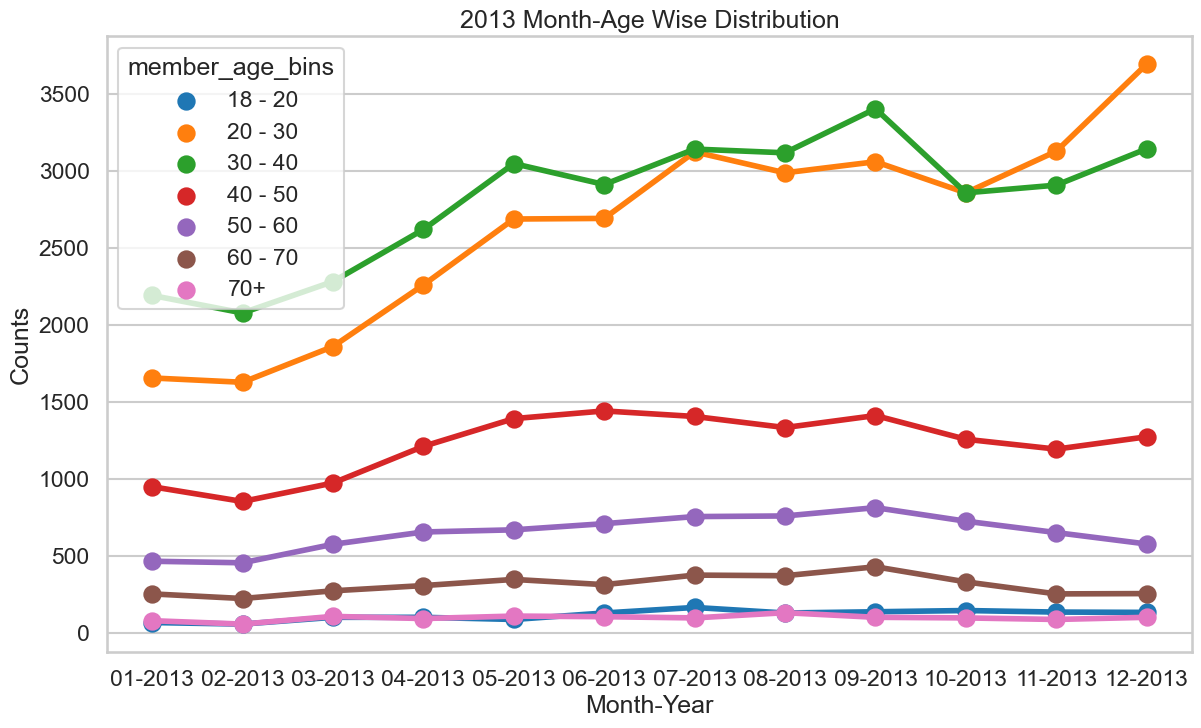

In [44]:
# Subset data for the year 2013
df3 = df_all[df_all['date_account_created'].dt.year == 2013]

# Create a new column with month-year format
df3['monthYear13'] = df3['date_account_created'].dt.strftime('%m-%Y')

# Group data by month-year and age bins, and count the values
df3 = df3.groupby(['monthYear13', 'member_age_bins']).count()

# Reset the index
df3.reset_index(inplace=True)

# Plot a pointplot
plt.figure(figsize=[14,8])
sns.pointplot(data=df3, x='monthYear13', y='affiliate_provider', hue='member_age_bins')
plt.title('2013 Month-Age Wise Distribution')
plt.xlabel('Month-Year')
plt.ylabel('Counts')


Text(0, 0.5, 'Counts')

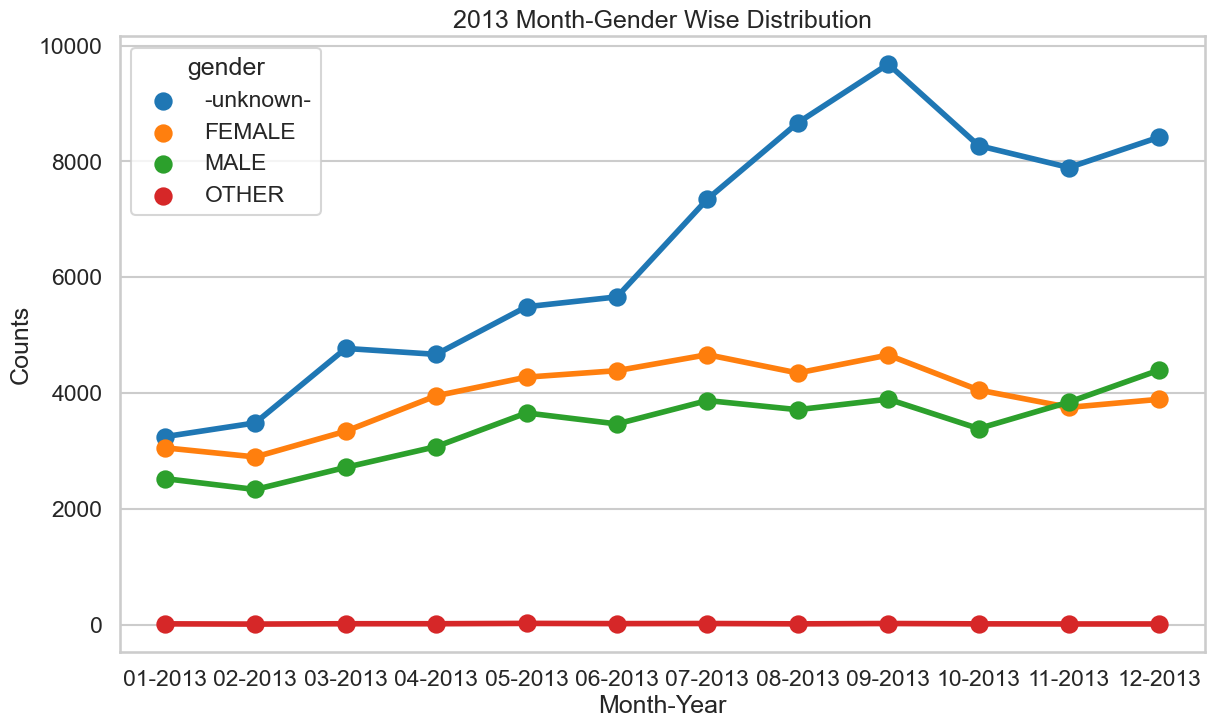

In [47]:
# Subset data for the year 2013
df3 = df_all[df_all['date_account_created'].dt.year == 2013]

# Create a new column with month-year format
df3['monthYear13'] = df3['date_account_created'].dt.strftime('%m-%Y')

# Group data by month-year and gender, and count the values
df3 = df3.groupby(['monthYear13', 'gender']).count()
df3.reset_index(inplace=True)

# Plot a point plot
plt.figure(figsize=[14,8])
sns.pointplot(data=df3, x='monthYear13', y='affiliate_provider', hue='gender')
plt.title('2013 Month-Gender Wise Distribution')
plt.xlabel('Month-Year')
plt.ylabel('Counts')


Text(0.5, 1.0, 'Country-Age Distribution')

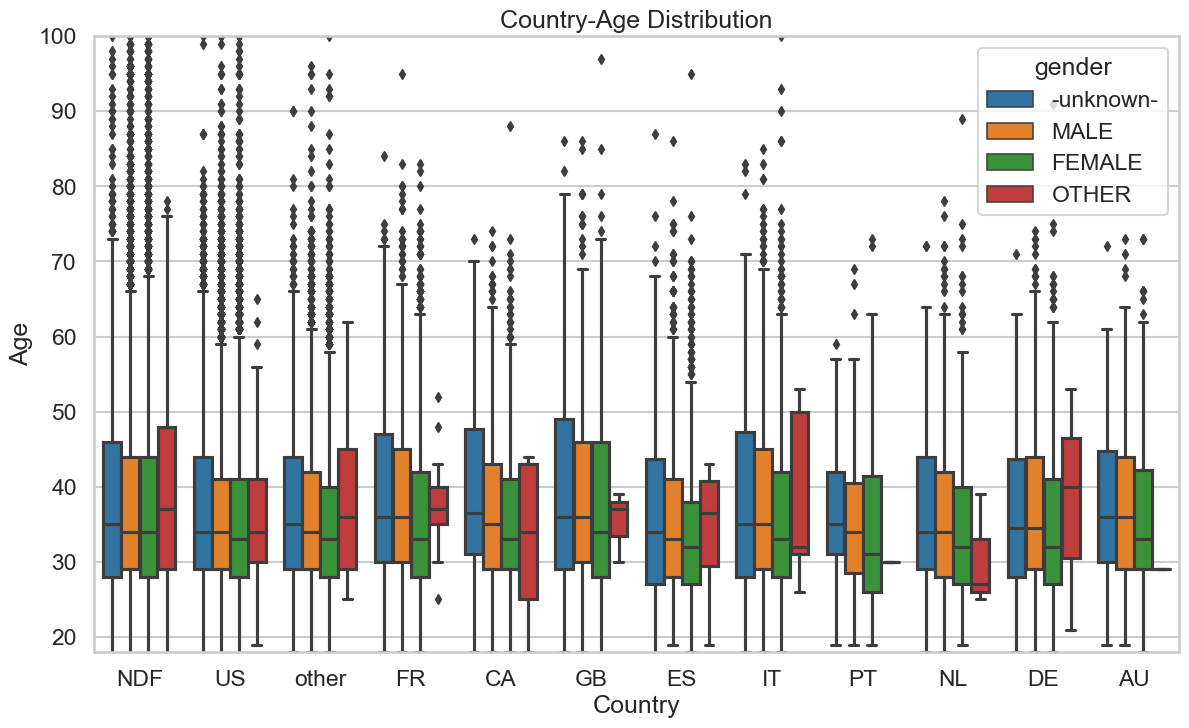

In [48]:
plt.figure(figsize=[14,8])
sns.boxplot(data=train_df,y='age',x='country_destination',hue='gender')
plt.ylim(18,100)
plt.xlabel('Country')
plt.ylabel('Age')
plt.title('Country-Age Distribution')
